**The Spark Foundataion: Data Science and business analytics Intership**

Task  : Prediction using Decision Tree Algorithm 

Statement : Create the Decision Tree classifier and visualize it graphically.

Author : Nikhil Pabbu

In [71]:
# Importing the required Libraries
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### **Import the dataset**<a name="subparagraph6"></a>


In [72]:
df=pd.read_csv("/content/Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Exploratory Data Analysis**<a name="subparagraph6"></a>


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [75]:
df.shape

(150, 6)

In [76]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [77]:
# remove 'Id ' in  dataset which has 150 unique values

df = df.drop(['Id'], axis=1)
df.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [78]:
#checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [79]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Data Visualization comparing various features**<a name="subparagraph6"></a>


<Axes: >

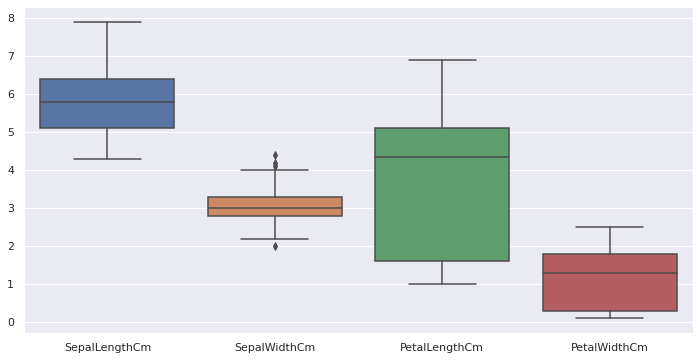

In [80]:
# Create box plots for each column with increased size
sns.set(rc={'figure.figsize':(12,6)}) # Set the figure size
sns.boxplot(data=df)

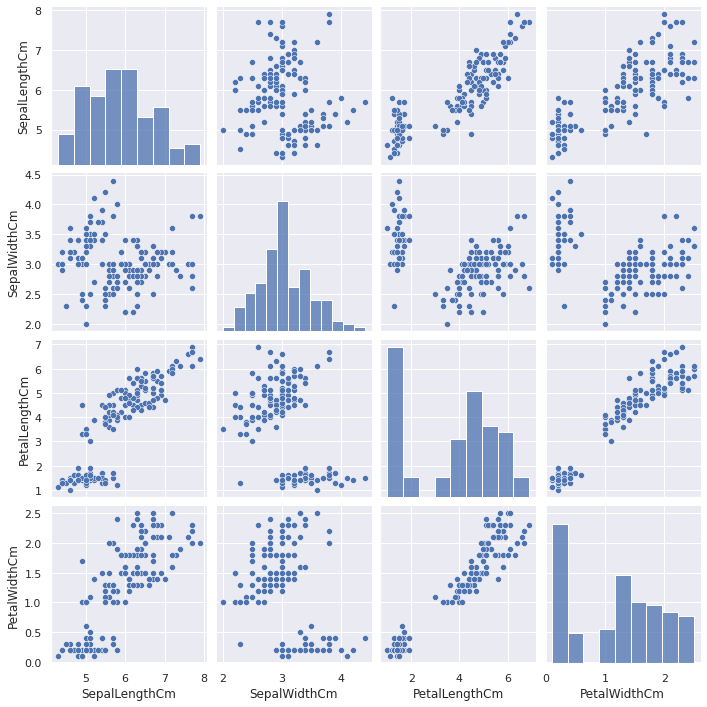

In [81]:
sns.pairplot(df)

In [82]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [83]:
#encoding the target column
df['Specices']=preprocessing.LabelEncoder().fit_transform(df['Species'])

In [84]:
# Drop the original column
df.drop('Species', axis=1, inplace=True)

In [85]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Specices
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **Train_test_split**<a name="subparagraph6"></a>


In [86]:
X = df.drop(columns=['Specices'], axis=1)
y = df['Specices']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1234)

In [88]:
print(X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### **Model Building** <a name="subparagraph6"></a>


In [89]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [90]:
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree=classifier_tree.fit(X_train,y_train)

In [91]:
# text graph representation
text_presentation=tree.export_text(classifier_tree)
print(text_presentation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



[Text(0.4, 0.9166666666666666, 'x[3] <= 0.75\ngini = 0.665\nsamples = 105\nvalue = [34, 33, 38]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.498\nsamples = 71\nvalue = [0, 33, 38]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1,

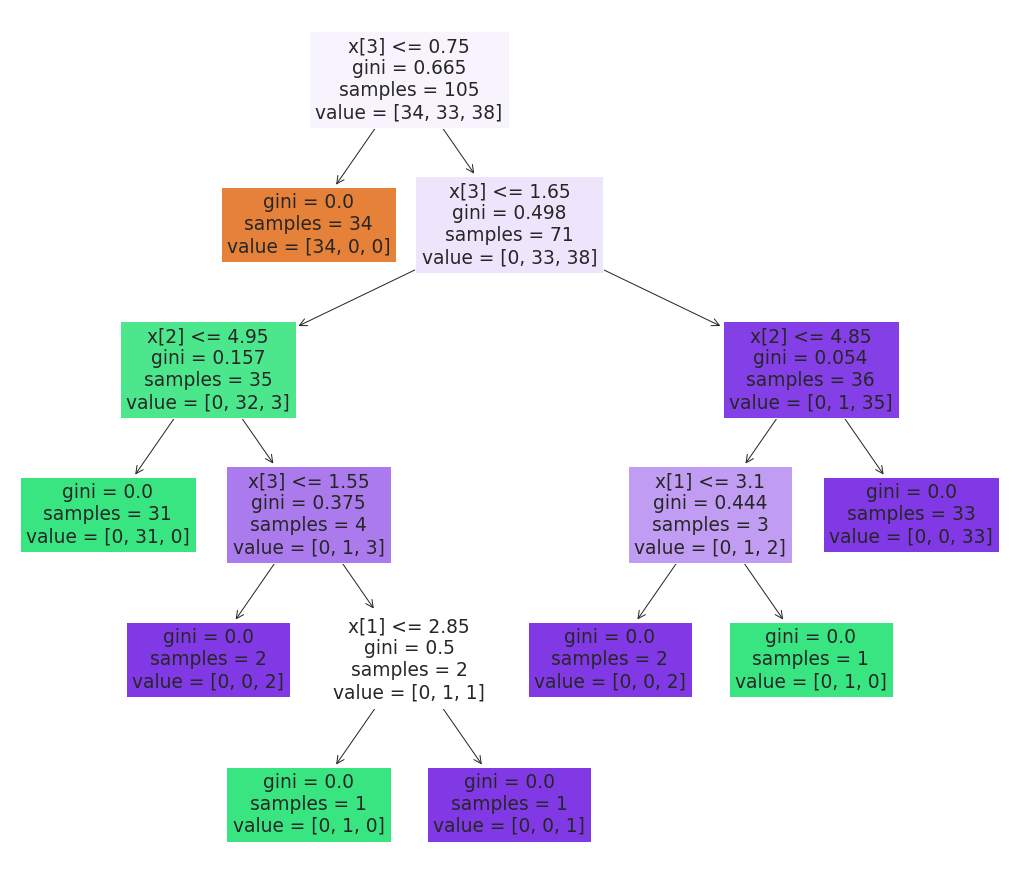

In [92]:
plt.figure(figsize=(18,16))
tree.plot_tree(classifier_tree,filled=True,impurity=True)

### **Metrics** <a name="subparagraph6"></a>


In [93]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2])

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 16  1]
 [ 0  0 12]]


In [95]:
cm_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of model:",cm_accuracy)

Accuracy of model: 0.9777777777777777


In [96]:
from sklearn import metrics
print(metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

